<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#25940A ;font-family:newtimeroman;color:white;font-size:300%;text-align:center;border-radius:60px 1px;">  Plant Disease Detection  </p>

<div style="width:100%;text-align: center; background-color:#white;"> <img align=middle src="https://static.standard.co.uk/2021/07/26/17/Flowerbox-houseplants-collectionjpg?width=1200&auto=webp&quality=75" alt="Decision Tree" >


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#234D18;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Import libraries
</p>
</div>

In [12]:
!pip install numpy matplotlib opencv-python tensorflow


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#234D18;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Read The Data
</p>
</div>

In [15]:
# Update the path to point to your local dataset directory
path = r'C:\Users\Dayam Nadeem\Desktop\ML Model\color'

train_ds, test_ds = keras.utils.image_dataset_from_directory(
    path,
    image_size=(224, 224),
    batch_size=32,
    seed=123,
    validation_split=0.2,
    subset='both'
)


Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


In [16]:
import tensorflow as tf

# Assuming 'train_ds' and 'test_ds' are the training and validation datasets
class_counts_train = {}
class_counts_val = {}

# Count samples in the training dataset
for images, labels in train_ds:
    for label in labels.numpy():
        class_name = train_ds.class_names[label]
        if class_name in class_counts_train:
            class_counts_train[class_name] += 1
        else:
            class_counts_train[class_name] = 1

# Count samples in the validation dataset
for images, labels in test_ds:
    for label in labels.numpy():
        class_name = train_ds.class_names[label]
        if class_name in class_counts_val:
            class_counts_val[class_name] += 1
        else:
            class_counts_val[class_name] = 1

# Print the counts
print("Training dataset counts per class:")
for class_name, count in class_counts_train.items():
    print(f"{class_name}: {count} files")

print("\nValidation dataset counts per class:")
for class_name, count in class_counts_val.items():
    print(f"{class_name}: {count} files")


Training dataset counts per class:
Grape___healthy: 329 files
Apple___healthy: 1297 files
Apple___Apple_scab: 510 files
Corn_(maize)___Northern_Leaf_Blight: 785 files
Potato___Early_blight: 815 files
Corn_(maize)___Common_rust_: 954 files
Grape___Black_rot: 951 files
Squash___Powdery_mildew: 1480 files
Orange___Haunglongbing_(Citrus_greening): 4370 files
Tomato___Early_blight: 813 files
Strawberry___healthy: 353 files
Grape___Esca_(Black_Measles): 1109 files
Tomato___Bacterial_spot: 1678 files
Peach___Bacterial_spot: 1851 files
Soybean___healthy: 4049 files
Tomato___Spider_mites Two-spotted_spider_mite: 1346 files
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 4279 files
Tomato___Late_blight: 1493 files
Tomato___Tomato_mosaic_virus: 296 files
Apple___Black_rot: 497 files
Tomato___healthy: 1262 files
Blueberry___healthy: 1184 files
Tomato___Target_Spot: 1150 files
Tomato___Septoria_leaf_spot: 1440 files
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 857 files
Strawberry___Leaf_scorch: 908 files
C

In [17]:
classes = train_ds.class_names
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#234D18;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
 Visualize Some Images
</p>
</div>

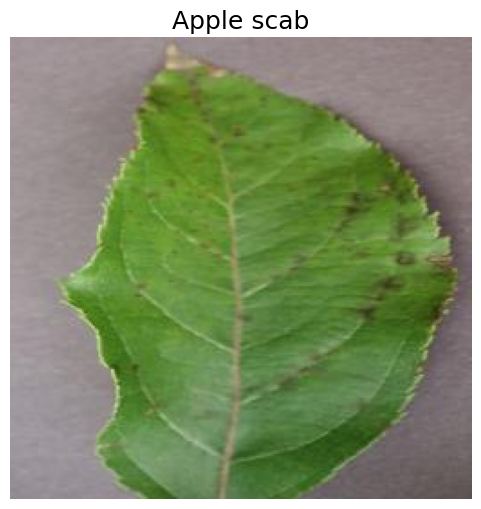

In [18]:
image_path = r"C:\Users\Dayam Nadeem\Desktop\ML Model\color\Apple___Apple_scab\0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG"

# Read the image from the local path
image = cv2.imread(image_path)

# Display the image using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title('Apple scab', size=18)
plt.axis('off')
plt.show()

----------------------------------

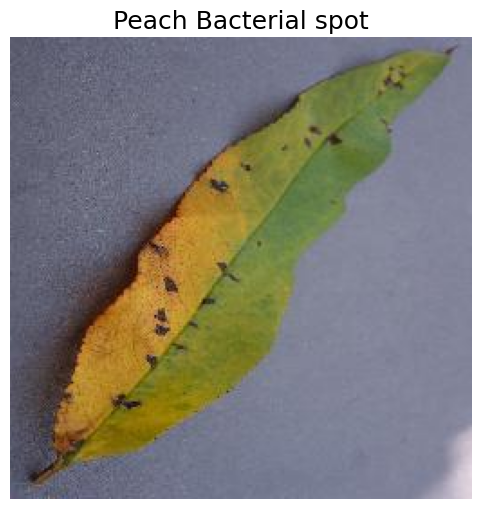

In [19]:
image_path = r"C:\Users\Dayam Nadeem\Desktop\ML Model\color\Peach___Bacterial_spot\00ddc106-692e-4c67-b2e8-569c924caf49___Rutg._Bact.S 1228.JPG"

# Read the image from the local path
image = cv2.imread(image_path)

# Display the image using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title('Peach Bacterial spot', size=18)
plt.axis('off')
plt.show()

-----------------------------

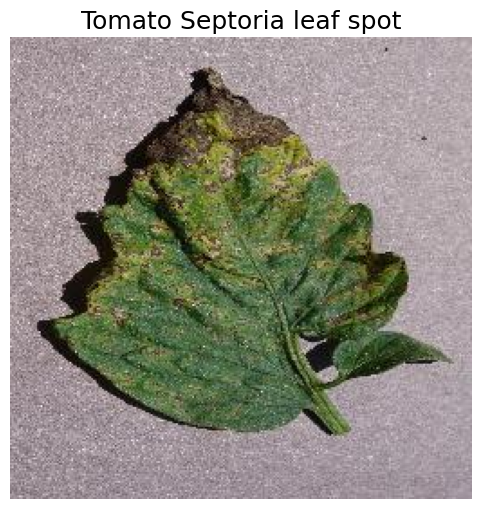

In [7]:
# Update the path to your local image file
image_path = r"C:\Users\Dayam Nadeem\Desktop\ML Model\color\Tomato___Septoria_leaf_spot\00f16858-f392-4d9e-ad9f-efab8049a13f___JR_Sept.L.S 8368.JPG"

# Read the image from the local path
image = cv2.imread(image_path)

# Display the image using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title('Tomato Septoria leaf spot', size=18)
plt.axis('off')
plt.show()

----------------------------------------
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#234D18;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Build Neural network [CNN]
</p>
</div>

In [20]:

model = keras.Sequential([
    keras.layers.Rescaling(scale = 1/255 , input_shape =(224,224,3) ) ,

    keras.layers.Conv2D(32 , (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((2,2))                     ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,

    # fully connected layers

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(38,activation ='sigmoid')

])

In [21]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # Change made here
)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 587,558 (2.24 MB)

 Trainable params: 587,558 (2.24 MB)

 Non-trainable params: 0 (0.00 B)

-------------------------------
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#234D18;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Train Our Model
</p>
</div>

In [22]:
history = model.fit(train_ds , epochs = 20)

Epoch 1/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 854s 623ms/step - accuracy: 0.3519 - loss: 2.4133
Epoch 2/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 706s 519ms/step - accuracy: 0.7543 - loss: 0.8046
Epoch 3/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 688s 506ms/step - accuracy: 0.8492 - loss: 0.4701
Epoch 4/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 693s 510ms/step - accuracy: 0.8821 - loss: 0.3615
Epoch 5/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 687s 506ms/step - accuracy: 0.9094 - loss: 0.2807
Epoch 6/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 686s 505ms/step - accuracy: 0.9265 - loss: 0.2277
Epoch 7/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 685s 504ms/step - accuracy: 0.9343 - loss: 0.1979
Epoch 8/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 734s 540ms/step - accuracy: 0.9403 - loss: 0.1792
Epoch 9/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 746s 549ms/step - accuracy: 0.9481 - loss: 0.1532
Epoch 10/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 692s 509ms/step - accuracy: 0.9498 - loss: 0.1471
Epoch 11/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 697s 513ms/step - accuracy: 0.9553 -

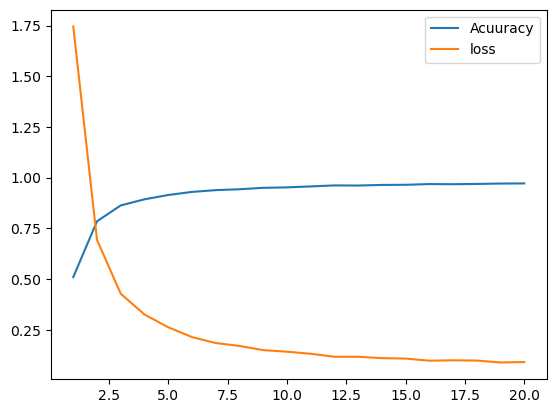

In [23]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,21)

plt.plot(epochs , accuracy , label = 'Acuuracy')
plt.plot(epochs , loss , label = 'loss')
plt.legend()
plt.show()

In [28]:
# Evaluate the model on the test dataset
results = model.evaluate(test_ds)

# Extract the loss and accuracy from the results
loss = results[0]
accuracy = results[1]

# Convert accuracy to percentage
accuracy_percentage = accuracy * 100
loss_percentage = loss * 100

# Print the results
print(f"Loss: {loss_percentage:.2f}%")
print(f"Accuracy: {accuracy_percentage:.2f}%")


340/340 ━━━━━━━━━━━━━━━━━━━━ 62s 183ms/step - accuracy: 0.9107 - loss: 0.3348
Loss: 32.62%
Accuracy: 91.10%


------------------------------------------
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#234D18;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Test model predictions
</p>
</div>

In [30]:
def img_to_pred(image):
  image = image.numpy()
  image = tf.expand_dims(image,0)
  return image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


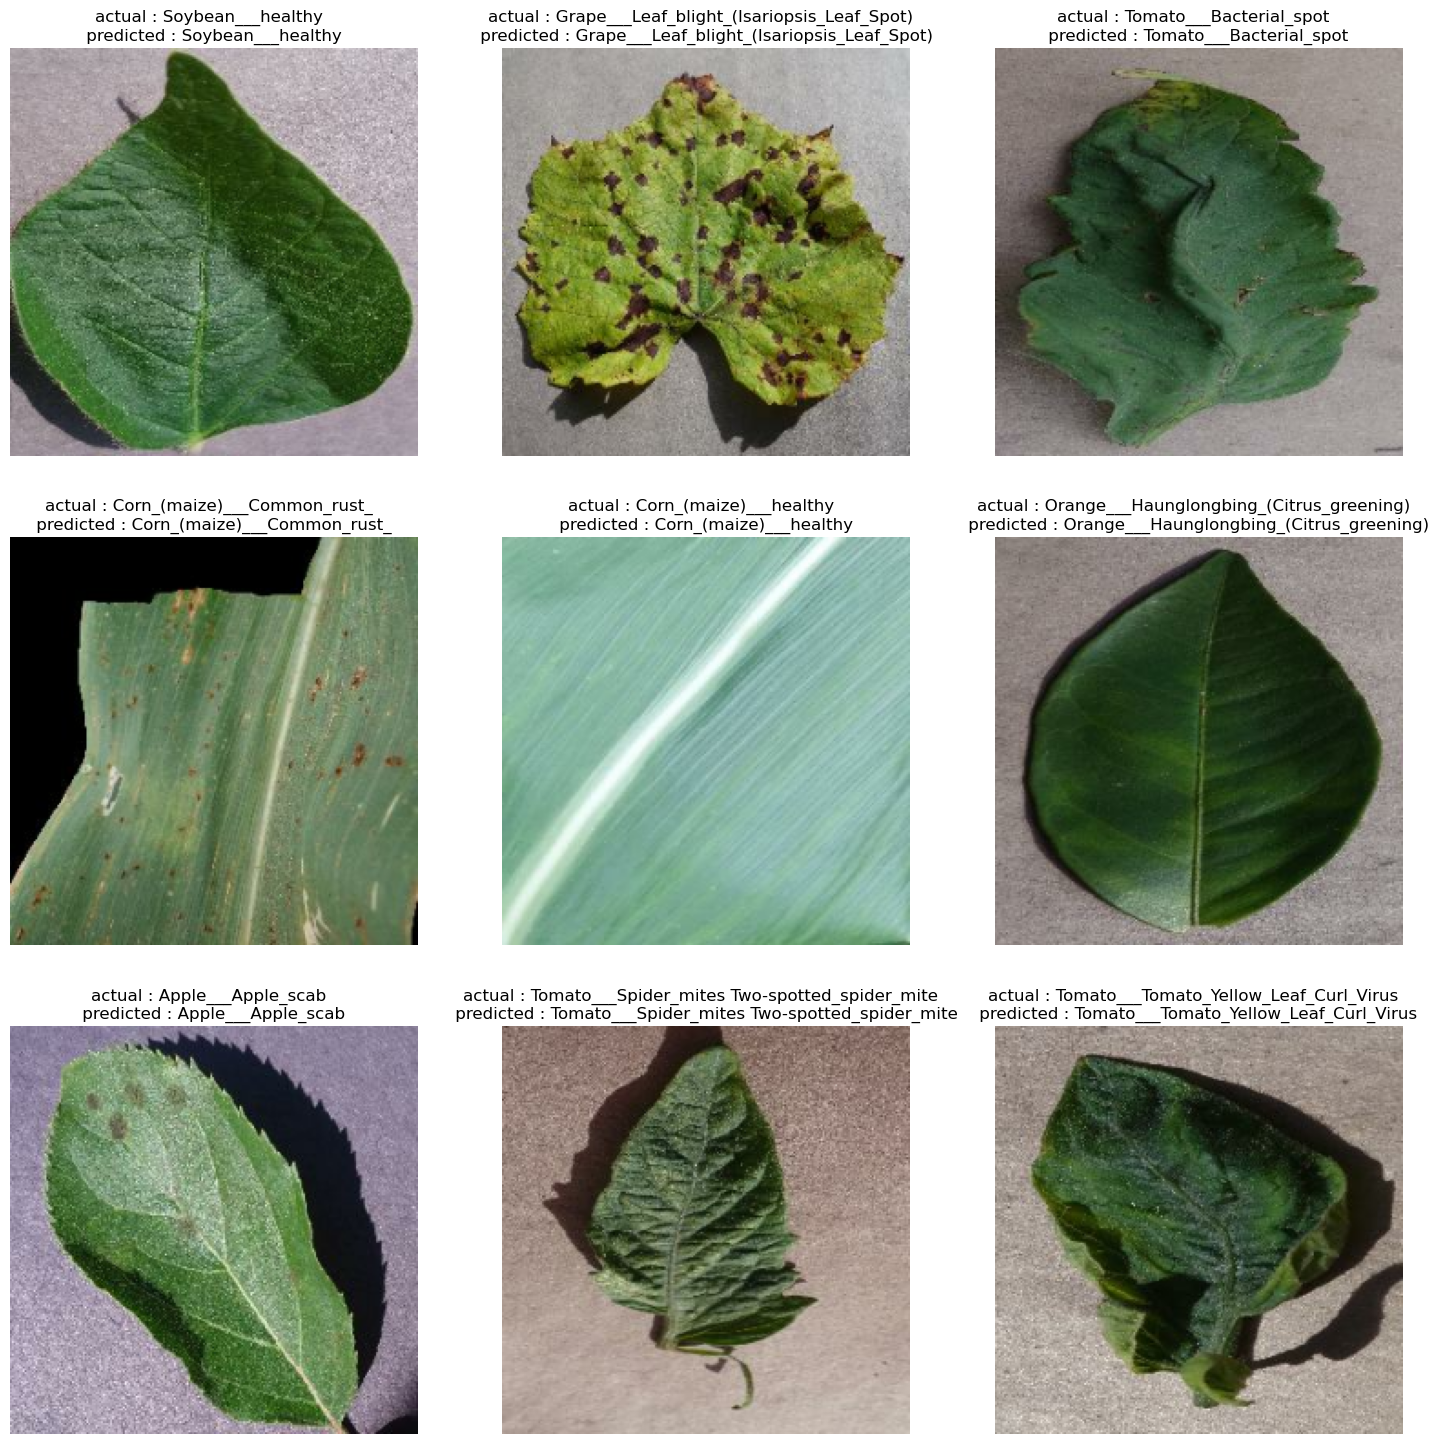

In [31]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1) : # take the first patch
  for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(images[i].numpy().astype('uint32'))
    plt.axis('off')
    actual = classes[labels[i]]
    predict =classes[np.argmax( model.predict(img_to_pred(images[i])))]
    plt.title(f"actual : {actual}  \n predicted : {predict} ")

In [34]:
import tensorflow as tf

# Assuming `model` is your trained Keras model in the notebook
save_model_path = r'C:\Users\Dayam Nadeem\Desktop\ML Model\plant-disease-detection.h5'
model.save(save_model_path)
print(f"Model saved to {save_model_path}")


Model saved to C:\Users\Dayam Nadeem\Desktop\ML Model\plant-disease-detection.h5


In [35]:
# Load the Keras model from the saved .h5 file
model = tf.keras.models.load_model(save_model_path)

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted TFLite model
save_tflite_path = r'C:\Users\Dayam Nadeem\Documents\AEC\model.tflite'
with open(save_tflite_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model successfully converted and saved to {save_tflite_path}")


INFO:tensorflow:Assets written to: C:\Users\DAYAMN~1\AppData\Local\Temp\tmpn98sm9e3\assets


INFO:tensorflow:Assets written to: C:\Users\DAYAMN~1\AppData\Local\Temp\tmpn98sm9e3\assets


Saved artifact at 'C:\Users\DAYAMN~1\AppData\Local\Temp\tmpn98sm9e3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 38), dtype=tf.float32, name=None)
Captures:
  1670689507280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1670689127120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1670689122896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1670689114448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1670689126928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1670689312208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1670689310096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1670689324304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1670689313936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1670689318544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

--------------------------
<p style="padding: 10px;
          color:#25940A ;
          font-size:240%;
          font-family:Serif;
          text-align:center;">   
Thanks For Reading !
</p>